In [1]:
import numpy as np

In [2]:
def generate(t, num_inputs):
  return np.eye(t, num_inputs)
f_t = generate(20, 7)

In [3]:
f_t[0,:]

array([1., 0., 0., 0., 0., 0., 0.])

In [4]:
def Laplace_transform(f_t, t, s, i):
  sum = 0
  if t > f_t.shape[0]:
    raise Exception("Cannot Calculate summation when t>tau")
  for tau in range(0, t+1):           # Make this for loop inclusive with t+1
    sum += f_t[t - tau,i] * (np.e ** (-s * tau))
  return sum

In [7]:
from math import factorial as fct
def Laplace_transform_prime(f_t, t, s, i):
  sum = 0
  if t > f_t.shape[0]:
    raise Exception("Cannot Calculate summation when t>tau")
  for tau in range(0, t+1):           # Make this for loop inclusive with t+1
    sum += -tau * f_t[t - tau,i] * (np.e ** (-s * tau))
  return sum

def inverse_laplace_transform(f_t, t, s, i, k):
  return (((-1) ** k)/fct(k)) * (s ** (k+1)) * Laplace_transform_prime(f_t, t, s, i)

In [13]:
f_1 = []
F_s = [[],[],[]]
f_s = [[],[],[]]
for t in range(20):
  f_1.append(f_t[t,1])
  for s in range(1,4):
    F_s[s-1].append(Laplace_transform(f_t, t, s, 1))
    f_s[s-1].append(inverse_laplace_transform(f_t, t, s, 1, 8))

[]

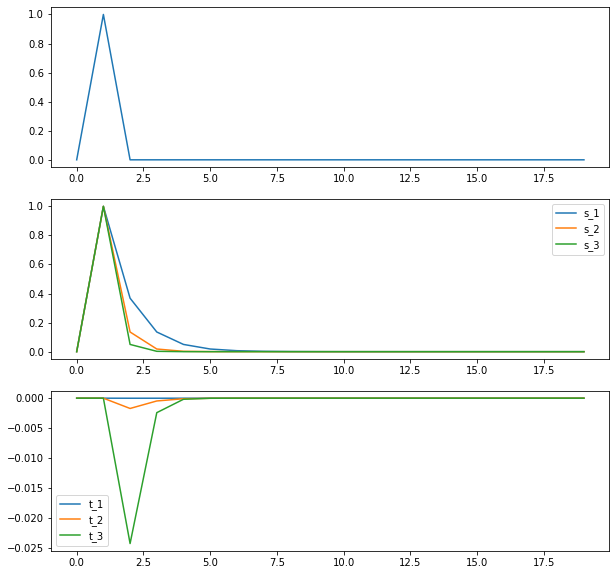

In [14]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(3, 1, figsize=(10,10))
axis[0].plot([i for i in range(20)], f_1)
axis[1].plot([i for i in range(20)], F_s[0], label='s_1')
axis[1].plot([i for i in range(20)], F_s[1], label='s_2')
axis[1].plot([i for i in range(20)], F_s[2], label='s_3')
axis[1].legend()
axis[2].plot([i for i in range(20)], f_s[0], label='t_1')
axis[2].plot([i for i in range(20)], f_s[1], label='t_2')
axis[2].plot([i for i in range(20)], f_s[2], label='t_3')
axis[2].legend()
plt.plot()

In [37]:
fourier_transform(f_t, 3, 1, 0)

0.0
0.0
0.0
0.04978706836786395


0.04978706836786395